# Group Project: Arxiv Classifier
Authors: Amir Yunus, Brandon Gay, Lee Oon Teng

In [1]:
from utils import load_data, split_data, save_model
from utils.architecture.convolutional_neural_network import ConvolutionalNeuralNetwork

# 15 - $M_9$: Convolutional Neural Network with Balanced Dataset


## 15.1 - Load the Data

In [2]:
filename = 'arxiv_balanced'
df = load_data(f'../data/03_{filename}_engineered.bin')
df.shape

,title_emb_0,title_emb_1,title_emb_2,title_emb_3,title_emb_4,title_emb_5,title_emb_6,title_emb_7,title_emb_8,title_emb_9,...,title_sentiment,summary_sentiment,comment_sentiment,authors_sentiment,title_ari,summary_ari,comment_ari,authors_ari,category,split
0,-0.340067,0.275288,0.076594,-0.272523,-0.307306,0.349464,0.359581,0.885010,-0.355955,-0.056723,...,0.500000,0.487771,0.444444,0.5,1.0,0.0,1.0,1.000000,physics,train
1,-0.115177,0.081050,0.103687,-0.238543,-0.431923,0.210272,0.157446,0.632112,-0.503011,-0.071692,...,0.500000,0.510417,0.444444,0.5,1.0,0.0,1.0,1.000000,physics,test
2,-0.392568,0.203008,0.196116,-0.296451,-0.194015,0.356909,0.407645,0.766410,-0.616156,0.025784,...,0.500000,0.513417,0.444444,0.5,1.0,0.0,1.0,0.483682,physics,train
3,-0.289894,0.239780,0.322290,-0.115017,0.041579,0.528063,0.223974,0.722394,-0.309294,0.099875,...,0.583333,0.546528,0.444444,0.5,1.0,0.0,1.0,0.860251,physics,val
4,-0.020201,0.345040,-0.169287,-0.099256,-0.514406,0.056388,0.380709,0.664660,-0.537006,-0.179937,...,0.500000,0.554500,0.444444,0.5,1.0,0.0,1.0,0.651046,physics,train


(40586, 3158)

## 15.2 - Split the Data

In [3]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(df, balance_data = True)

Train set: 13264 samples
Validation set: 5768 samples
Test set: 2120 samples

Samples per category after balancing:

Train set:
category
physics                                       1658
computer science                              1658
mathematics                                   1658
quantitative biology                          1658
quantitative finance                          1658
electrical engineering and systems science    1658
economics                                     1658
statistics                                    1658
Name: count, dtype: int64

Validation set:
category
physics                                       721
computer science                              721
mathematics                                   721
quantitative biology                          721
quantitative finance                          721
electrical engineering and systems science    721
economics                                     721
statistics                                    721
Nam

## 15.3 - Create the Model Object

In [4]:
m9_model = ConvolutionalNeuralNetwork(input_dim=X_train.shape[1])

Using 8 GPUs!
Using device: cuda


## 15.4 - Train the Model

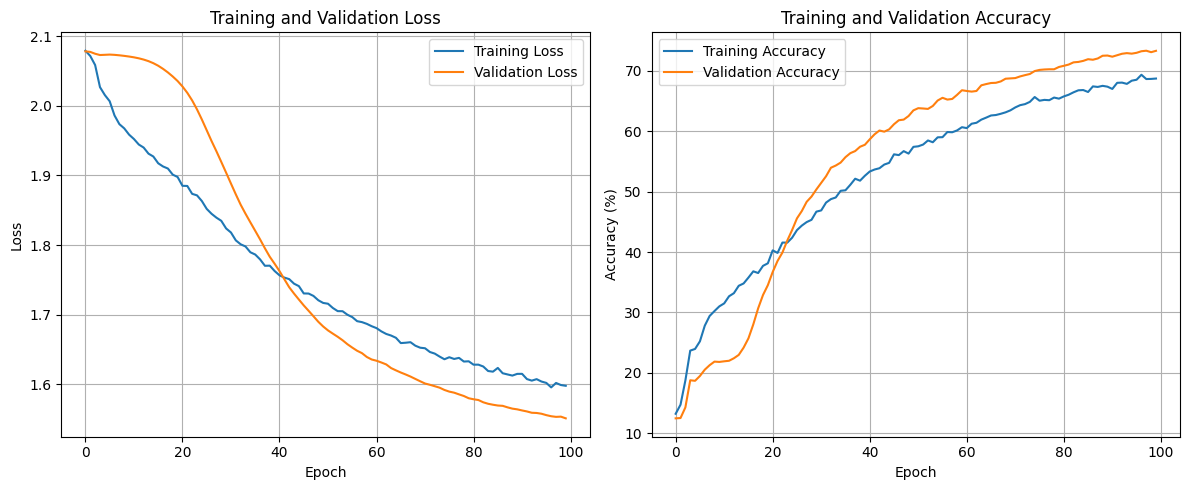

Training: 100%|██████████| 100/100 [02:21<00:00,  1.42s/it, train_loss=1.5977, val_loss=1.5510, train_acc=68.68%, val_acc=73.27%]


In [5]:
train_loss, val_loss = m9_model.fit(X_train, y_train, X_val, y_val, batch_size = 20_000)

## 15.5 - Evaluate the Model


Classification Report:
                                            precision    recall  f1-score   support

                          computer science       0.72      0.64      0.67       265
                                 economics       0.58      0.63      0.60       265
electrical engineering and systems science       0.76      0.85      0.80       265
                               mathematics       0.88      0.79      0.83       265
                                   physics       0.91      0.98      0.95       265
                      quantitative biology       0.72      0.84      0.77       265
                      quantitative finance       0.68      0.71      0.69       265
                                statistics       0.70      0.49      0.58       265

                                  accuracy                           0.74      2120
                                 macro avg       0.74      0.74      0.74      2120
                              weighted avg       0

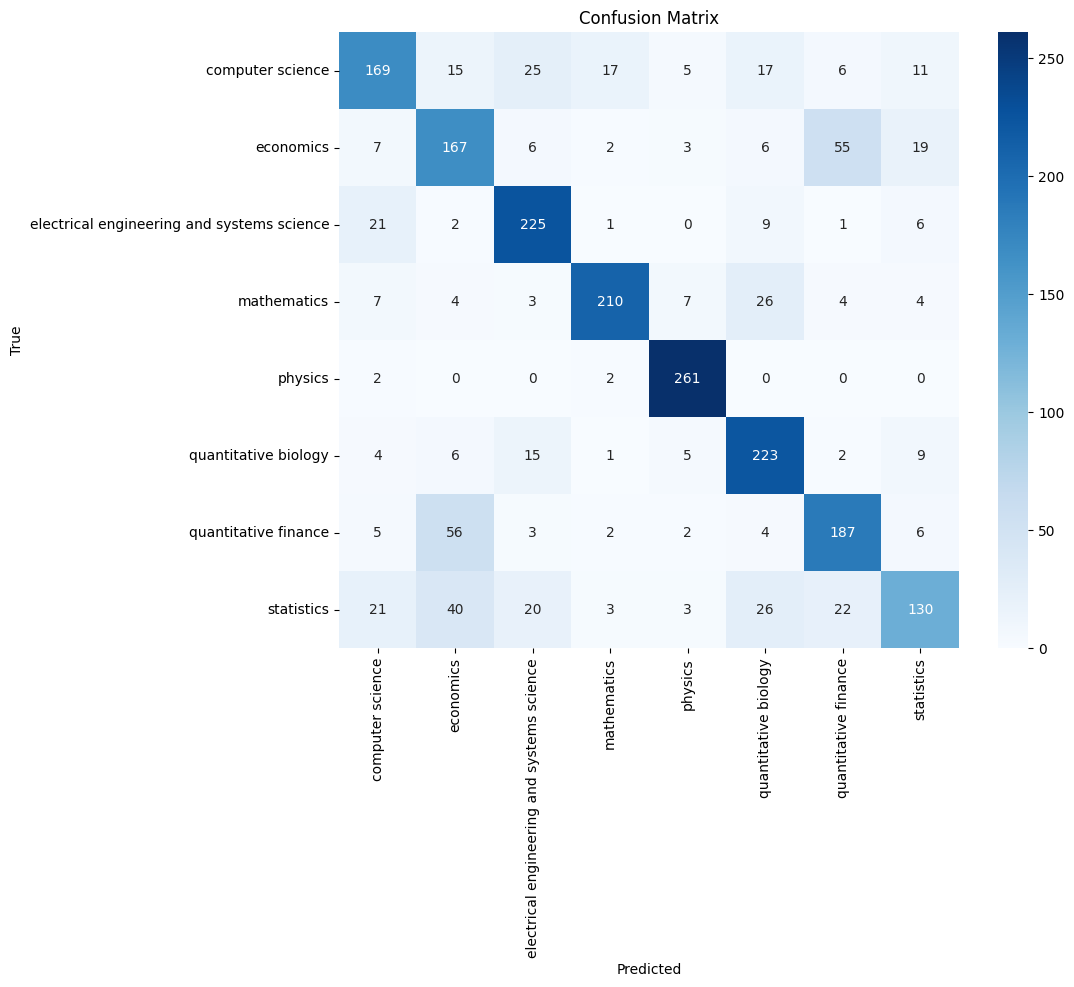

array(['physics', 'physics', 'physics', ..., 'statistics', 'statistics',
       'statistics'], dtype='<U42')

In [6]:
m9_model.predict(X_test, y_test)

## 15.6 - Save the Model

In [7]:
save_model(m9_model, '../models/m9_balanced_cnn.bin')


Model saved successfully to ../models/m9_balanced_cnn.bin
